# Energy spectrum for selected detector

### Categorize the data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pp

detector_n = 84

In [7]:
df = pd.read_csv('./data/events.csv', sep='\t', index_col=0)
df.head()

,time,detector,energy
0,8.514833e+10,58.0,0.000001
1,8.514833e+10,13.0,0.000001
2,8.514834e+10,3.0,0.000001
3,8.514835e+10,58.0,0.000001
4,8.514836e+10,30.0,0.000001


In [43]:
detector_energies = [[] for i in range(detector_n)]
for i in range(len(df['detector'])):
    detector_id = int(df['detector'][i])
    detector_energies[detector_id-1].append(df['energy'][i]*1e9)

In [44]:
def plot_detector_energy(n_detector, bins_hist=90):
    ranges = (np.min(detector_energies[n_detector]), np.max(detector_energies[n_detector]))
    print(f"Number of events detected: {len(detector_energies[n_detector])}")
    hist, bins = np.histogram(detector_energies[n_detector], bins=bins_hist, range=ranges)
    pp.plot(hist)
    pp.yscale('log')
    pp.title(f'Energy spectrum of detector {n_detector}')
    pp.ylabel('Events')
    pp.xlabel('Energy (neV)')
    proc20 = int(bins_hist/5)
    pp.xticks([proc20*i for i in range(5)], [int(bins[proc20*i]) for i in range(5)])

Number of events detected: 11796


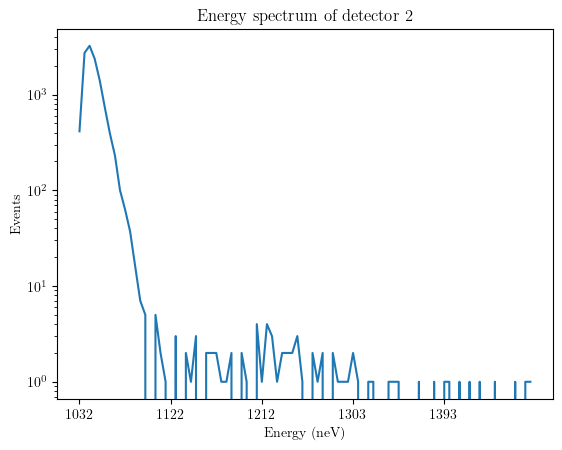

In [50]:
plot_detector_energy(2)

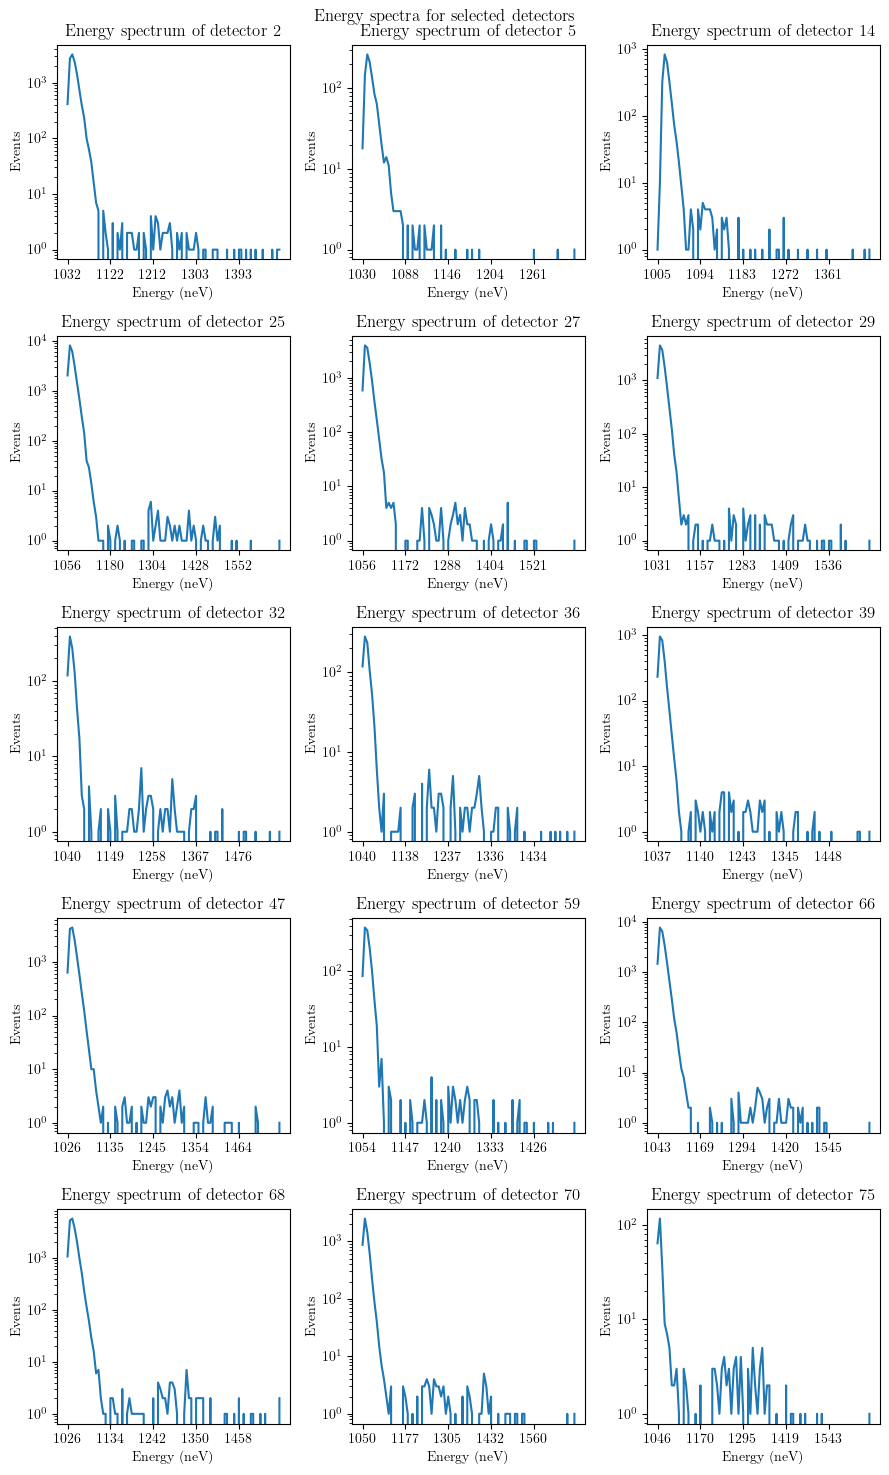

In [67]:
detectors15 = [2,5,14,25,27,29,32,36,39,47,59,66,68,70,75]
fig, axs = pp.subplots(5,3, figsize=(9, 15))
fig.suptitle("Energy spectra for selected detectors")
for x in range(5):
    for y in range(3):
        ax = axs[x][y]
        detector = detectors15[3*x+y]
        ranges = (np.min(detector_energies[detector]), np.max(detector_energies[detector]))
        hist, bins = np.histogram(detector_energies[detector], bins=90, range=ranges)
        ax.plot(hist)
        ax.set_yscale('log')
        ax.set_title(f'Energy spectrum of detector {detector}')
        ax.set_ylabel('Events')
        ax.set_xlabel('Energy (neV)')
        proc20 = int(90/5)
        ax.set_xticks([proc20*i for i in range(5)], [int(bins[proc20*i]) for i in range(5)])
fig.tight_layout()